In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [8]:
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X

In [9]:
X

array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       [0.54488318],
       [0.4236548 ],
       [0.64589411],
       [0.43758721],
       [0.891773  ],
       [0.96366276],
       [0.38344152],
       [0.79172504],
       [0.52889492],
       [0.56804456],
       [0.92559664],
       [0.07103606],
       [0.0871293 ],
       [0.0202184 ],
       [0.83261985],
       [0.77815675],
       [0.87001215],
       [0.97861834],
       [0.79915856],
       [0.46147936],
       [0.78052918],
       [0.11827443],
       [0.63992102],
       [0.14335329],
       [0.94466892],
       [0.52184832],
       [0.41466194],
       [0.26455561],
       [0.77423369],
       [0.45615033],
       [0.56843395],
       [0.0187898 ],
       [0.6176355 ],
       [0.61209572],
       [0.616934  ],
       [0.94374808],
       [0.6818203 ],
       [0.3595079 ],
       [0.43703195],
       [0.6976312 ],
       [0.06022547],
       [0.66676672],
       [0.67063787],
       [0.21038256],
       [0.128

In [10]:
Y

array([[ 0.89265858],
       [ 2.38752156],
       [ 2.15961945],
       [ 4.96149231],
       [ 2.98073067],
       [ 8.01247933],
       [ 8.96719581],
       [16.02429439],
       [ 3.69203375],
       [ 8.02841028],
       [ 1.22560568],
       [17.04758499],
       [11.07345374],
       [11.98819391],
       [ 1.52194396],
       [10.66520147],
       [ 2.67245837],
       [15.01048615],
       [ 0.79358896],
       [ 6.03798163],
       [ 5.65151268],
       [15.55433529],
       [19.93449315],
       [19.07361988],
       [10.86349136],
       [ 7.10457448],
       [ 6.9437797 ],
       [12.62941239],
       [ 2.55801144],
       [ 3.20831321],
       [17.54352111],
       [12.5556587 ],
       [10.87531794],
       [15.38697521],
       [17.84658869],
       [16.05272096],
       [ 5.87981803],
       [ 2.45624419],
       [ 2.16586229],
       [12.33290287],
       [ 1.24313199],
       [19.95816899],
       [10.94576821],
       [ 1.63326483],
       [ 6.7952155 ],
       [13

In [11]:
input_neurons = 1
hidden_neurons = 3
output_neurons = 1

In [12]:
W1 = np.random.randn(input_neurons, hidden_neurons) * 0.1
b1 = np.zeros((1, hidden_neurons))

In [13]:
W2 = np.random.randn(hidden_neurons, output_neurons) * 0.1
b2 = np.zeros((1, output_neurons))

In [14]:
lr = 0.5
epochs = 2000
loss_history = []

In [15]:
def forward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    return z1, a1, z2, y_hat


In [16]:
def compute_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)


In [17]:
def backprop(X, y, y_hat, a1, W2):
    error_output = (y - y_hat) * sigmoid_derivative(y_hat)
    error_hidden = np.dot(error_output, W2.T) * sigmoid_derivative(a1)
    return error_output, error_hidden


In [18]:
for epoch in range(epochs):

    z1, a1, z2, y_hat = forward(X, W1, b1, W2, b2)

    loss = compute_loss(y, y_hat)
    loss_history.append(loss)

    error_output, error_hidden = backprop(X, y, y_hat, a1, W2)

    W2 += lr * np.dot(a1.T, error_output)
    b2 += lr * np.sum(error_output, axis=0, keepdims=True)

    W1 += lr * np.dot(X.T, error_hidden)
    b1 += lr * np.sum(error_hidden, axis=0, keepdims=True)

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.5f}")

Epoch 0, Loss = 0.50915
Epoch 200, Loss = 0.25760
Epoch 400, Loss = 0.25760
Epoch 600, Loss = 0.25760
Epoch 800, Loss = 0.25760
Epoch 1000, Loss = 0.25760
Epoch 1200, Loss = 0.25760
Epoch 1400, Loss = 0.25760
Epoch 1600, Loss = 0.25760
Epoch 1800, Loss = 0.25760


/tmp/ipython-input-1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


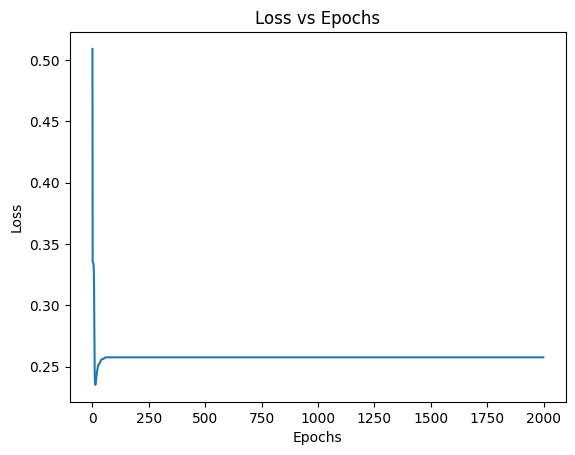

In [21]:
plt.plot(loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [22]:
test_input = np.array([[0.5]])

hidden = sigmoid(np.dot(test_input, W1) + b1)
prediction = sigmoid(np.dot(hidden, W2) + b2)

print("\nTest Input:", test_input)
print("Predicted Output:", prediction)
print("Actual Output:", 2 * test_input)


Test Input: [[0.5]]
Predicted Output: [[1.]]
Actual Output: [[1.]]
